# Test 14: Z-test for two correlation coefficients

## Objective

- To investigate the significance of the difference between the correlation coefficients for a pair of variables occurring from two different samples and the difference between two specified values $\rho_1$ and $\rho_2$

## Assumptions

- $x$ and $y$ values originate from normal distributions
- $Var[y] \perp x$
- $x$ and $y$ have a linear relationship

## Method

- Recall the following definitions from `Test 12` and `Test 13`:
    - $r$: Correlation coefficient
    - $Z_1$: Fisher Z transformation of the correlation coefficient (to turn [-1,+1] bounded correlation into normal distribution)
    - Under the null hypothesis that $r = \rho$, we expect that the test statistic $Z_1 \sim N(\mu_Z, \sigma_Z)$ where
        - $\mu_Z = \frac{1}{2} \cdot \ln{(\frac{1 + \rho}{1 - \rho})}$
        - $\sigma_Z = \frac{1}{\sqrt{n - 3}}$
    - $n$ is the number of samples taken of this correlation coefficient
    
$$\begin{aligned}
    r &= \frac{\sum (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{[\sum (x_i - \bar{x_i})^2 \cdot \sum (y_i - \bar{y_i})^2]}} \\ \\

    Z_1 &= 0.5 \cdot \ln({\frac{1+r}{1-r}})
\end{aligned}$$
    

- In this case, we have 2 correlation coefficients to deal with, $r_1$ and $r_2$, and so 2 corresponding values of $Z_1$ and $Z_2$

- Similar to `Test 3`, the test statistic is now
$$
    Z = \frac{(Z_1 - Z_2) - (\mu_{Z_1} - \mu_{Z_2})}{\sqrt{\sigma_{Z_1}^2 + \sigma_{Z_2}^2}}
$$

- Z follows a standard normal distribution

## Example

- Problem 

    - A market research company is keen to categorize a variety of brands of potato crisp based on the correlation coefficients of consumer preferences. 

    - The market research company has found that if consumers’ preferences for brands are similar then marketing programmes can be merged. 

    - Two brands of potato crisp are compared for two advertising regions. Panels are selected of sizes $n_1 = 28$ and $n_2 = 35$ for the two regions 

    - Correlation coefficients are $r_1 = 0.5$ and $r_2 = 0.3$

- Question
    - Are the two associations statistically different or can marketing programmes be merged?


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rho1 = rho2 = 0.5
r1 = 0.5
r2 = 0.3

n1 = 28
n2 = 35

mu1 = 0.5 * np.log((1+rho1)/(1-rho1))
mu2 = 0.5 * np.log((1+rho2)/(1-rho2))
sigma1 = 1 / (n1-3)**0.5
sigma2 = 1 / (n2-3)**0.5

z1 = 0.5 * np.log((1+r1)/(1-r1))
z2 = 0.5 * np.log((1+r2)/(1-r2))

## Do not reject null that the correlations are equal
test_statistic = ((z1 - z2) - (mu1 - mu2)) / (sigma1**2 + sigma2**2)**0.5
test_statistic

0.898322685179623

## Proof that test statistic is standard normal by simulation

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
def generate_correlated_data(correlation):
    '''
    If you're not sure why this works, see `Test 13` under `Proof by simulation that test statistic is normal`
    '''
    X1_POPULATION = np.random.normal(0,20,10_000)
    X2_POPULATION = (correlation * X1_POPULATION) + (((1 - correlation**2)**0.5) * np.random.normal(0,20,10_000))

    # print(np.corrcoef(X1_POPULATION, X2_POPULATION))
    assert(abs(np.corrcoef(X1_POPULATION, X2_POPULATION)[0,1] - correlation) < 0.05)
    
    return X1_POPULATION, X2_POPULATION

def fisher_z_transform(correlation):
    return 0.5 * np.log((1+correlation)/(1-correlation))

X1_PLACE1_POPULATION, X2_PLACE1_POPULATION = generate_correlated_data(0.5)
X1_PLACE2_POPULATION, X2_PLACE2_POPULATION = generate_correlated_data(0.3)

SAMPLE_SIZE_1 = 50
SAMPLE_SIZE_2 = 75
RHO1 = RHO2 = 0.5

def get_test_statistic():
    sample_index1 = np.random.choice(range(len(X1_PLACE1_POPULATION)), SAMPLE_SIZE_1)
    x11 = X1_PLACE1_POPULATION[sample_index1]
    x21 = X2_PLACE1_POPULATION[sample_index1]
    sample_corr1 = np.sum(
        (x11 - np.mean(x11)) * (x21 - np.mean(x21))
    ) / (
        np.sum((x11 - np.mean(x11))**2) *
        np.sum((x21 - np.mean(x21))**2)
    )**0.5
    mu1 = 0.5 * np.log((1+RHO1)/(1-RHO1))
    sigma1 = 1 / (SAMPLE_SIZE_1 - 3)**0.5
    z1 = fisher_z_transform(sample_corr1)

    sample_index2 = np.random.choice(range(len(X1_PLACE2_POPULATION)), SAMPLE_SIZE_2)
    x12 = X1_PLACE1_POPULATION[sample_index2]
    x22 = X2_PLACE1_POPULATION[sample_index2]
    sample_corr2 = np.sum(
        (x12 - np.mean(x12)) * (x22 - np.mean(x22))
    ) / (
        np.sum((x12 - np.mean(x12))**2) *
        np.sum((x22 - np.mean(x22))**2)
    )**0.5
    mu2 = 0.5 * np.log((1+RHO2)/(1-RHO2))
    sigma2 = 1 / (SAMPLE_SIZE_2 - 3)**0.5
    z2 = fisher_z_transform(sample_corr2)

    test_statistic = (
        (z1-z2) - (mu1 - mu2)
    ) / (
        (sigma1**2 + sigma2**2)**0.5
    )
    return test_statistic

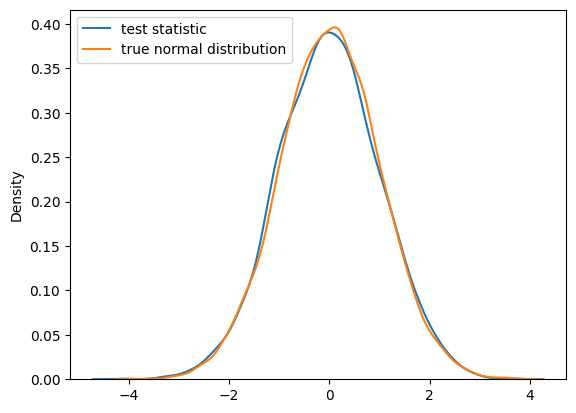

In [68]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_normal_distribution = np.random.normal(0,1,10_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='true normal distribution')
plt.legend()